In this notebook, performing visualize distribution of target variable w.r.t predictors

In [ ]:
!pip install --upgrade pip --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

In [2]:
!pip install --upgrade pandas --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [3]:
!pip install --upgrade numpy --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple

Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
%matplotlib inline

In [5]:
# Reading LOA data 
Hype_LOA_Active = pd.read_csv('Hype_LOA_Active.csv')

In [6]:
#S Shape of LOA data
Hype_LOA_Active.shape

(1290567, 31)

In [7]:
Hype_LOA_Active.head(2)

,Unnamed: 0,person_internal_id,client_id,udp_global_id,age,gender,marital_status,is_union,country_description,state,...,original_hire_date,rehire_date,is_rehire,termination_date,base_pay_regular_payrate_amount,base_pay_regular_frequency_code,base_pay_regular_frequency_description,base_pay_regular_expectedannualsalary,base_pay_regular_expectedannualsalary_range,mapped_employment_status_code_label
0,0,46524,8101,58fbc32969b3120424508ae4,60.0,unknown,Married,Y,United States of America,PA,...,5/17/2010,NaN,N,12/31/2299,81402.84,A1,Annual,81402.84,"$80,000-$99,999",1
1,1,255317740,3349,58a39ba9f7a4410c1584e210,60.0,male,Married,N,United States of America,GA,...,1/2/2013,NaN,N,12/31/2299,89110.00,A1,Annual,89110.00,"$80,000-$99,999",1


In [8]:
# Removing the first column unnamed
Hype_LOA_Active = Hype_LOA_Active.iloc[:,1:]

In [9]:
#check missing values
Hype_LOA_Active.isna().sum()

person_internal_id                                  1
client_id                                           0
udp_global_id                                       0
age                                               994
gender                                           5153
marital_status                                 369014
is_union                                            0
country_description                             81618
state                                           96387
platform_indicator_code                         73938
mapped_employment_status_code                       0
mapped_employment_status_description                0
mapped_fullpart_code                           300289
mapped_fullpart_description                    300289
mapped_permanent_temporary_code                743486
mapped_permanent_temporary_description         759674
mapped_hourly_salary_code                      406923
mapped_hourly_salary_description               406923
mapped_flex_status_code     

In [10]:
# Hype_LOA_Active.nunique()

In [11]:
Hype_LOA_Active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290567 entries, 0 to 1290566
Data columns (total 30 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   person_internal_id                           1290566 non-null  object 
 1   client_id                                    1290567 non-null  int64  
 2   udp_global_id                                1290567 non-null  object 
 3   age                                          1289573 non-null  float64
 4   gender                                       1285414 non-null  object 
 5   marital_status                               921553 non-null   object 
 6   is_union                                     1290567 non-null  object 
 7   country_description                          1208949 non-null  object 
 8   state                                        1194180 non-null  object 
 9   platform_indicator_code                      1

In [12]:
# Hype_LOA_Active.groupby(['gender'],dropna=False)['mapped_employment_status_code_label'].value_counts().unstack().plot(kind='bar',stacked=True)

Creating a function to plot categorical variables with respect to the target variable, also filling up missing values with 'unknown' as per requirement

In [13]:
def cat_plot(predictor):
    df = Hype_LOA_Active
    c = ['rosybrown','dimgray','skyblue','steelblue','salmon','teal','indianred', 'darkturquoise', 'skyblue','olive','firebrick','yellowgreen','maroon','cyan']
    fig,axes = plt.subplots(2,2,figsize=(15,10))
    df.groupby(predictor, observed=True, dropna=False, sort=False)['person_internal_id'].count().plot(kind='bar',stacked=True,color='indianred',legend=False,ax=axes[0,0])
    #df[predictor].value_counts(sort=False).plot(kind='bar',ax=axes[0])
    df.groupby(predictor, observed=True, dropna=False, sort=False)['mapped_employment_status_code_label'].value_counts().unstack().plot(kind='bar',stacked=True,color=c,ax=axes[0,1])
    df.groupby('mapped_employment_status_code_label', observed=True, dropna=False, sort=False)[predictor].value_counts().unstack().plot(kind='bar',stacked=True,color=c,ax=axes[1,0])
    df.groupby(predictor, observed=True, dropna=False, sort=False)['mapped_employment_status_code'].value_counts().unstack().plot(kind='bar',stacked=True,color=c,ax=axes[1,1])
    plt.legend(bbox_to_anchor =(1, 1), ncol = 2 )
    plt.show()

In [14]:
#extract object columns
object_col = Hype_LOA_Active.select_dtypes('object').columns
for i in object_col:
    print(i)

person_internal_id
udp_global_id
gender
marital_status
is_union
country_description
state
platform_indicator_code
mapped_employment_status_code
mapped_employment_status_description
mapped_fullpart_code
mapped_fullpart_description
mapped_permanent_temporary_code
mapped_permanent_temporary_description
mapped_hourly_salary_code
mapped_hourly_salary_description
mapped_flex_status_code
mapped_flex_status_description
original_hire_date
rehire_date
is_rehire
termination_date
base_pay_regular_frequency_code
base_pay_regular_frequency_description
base_pay_regular_expectedannualsalary_range


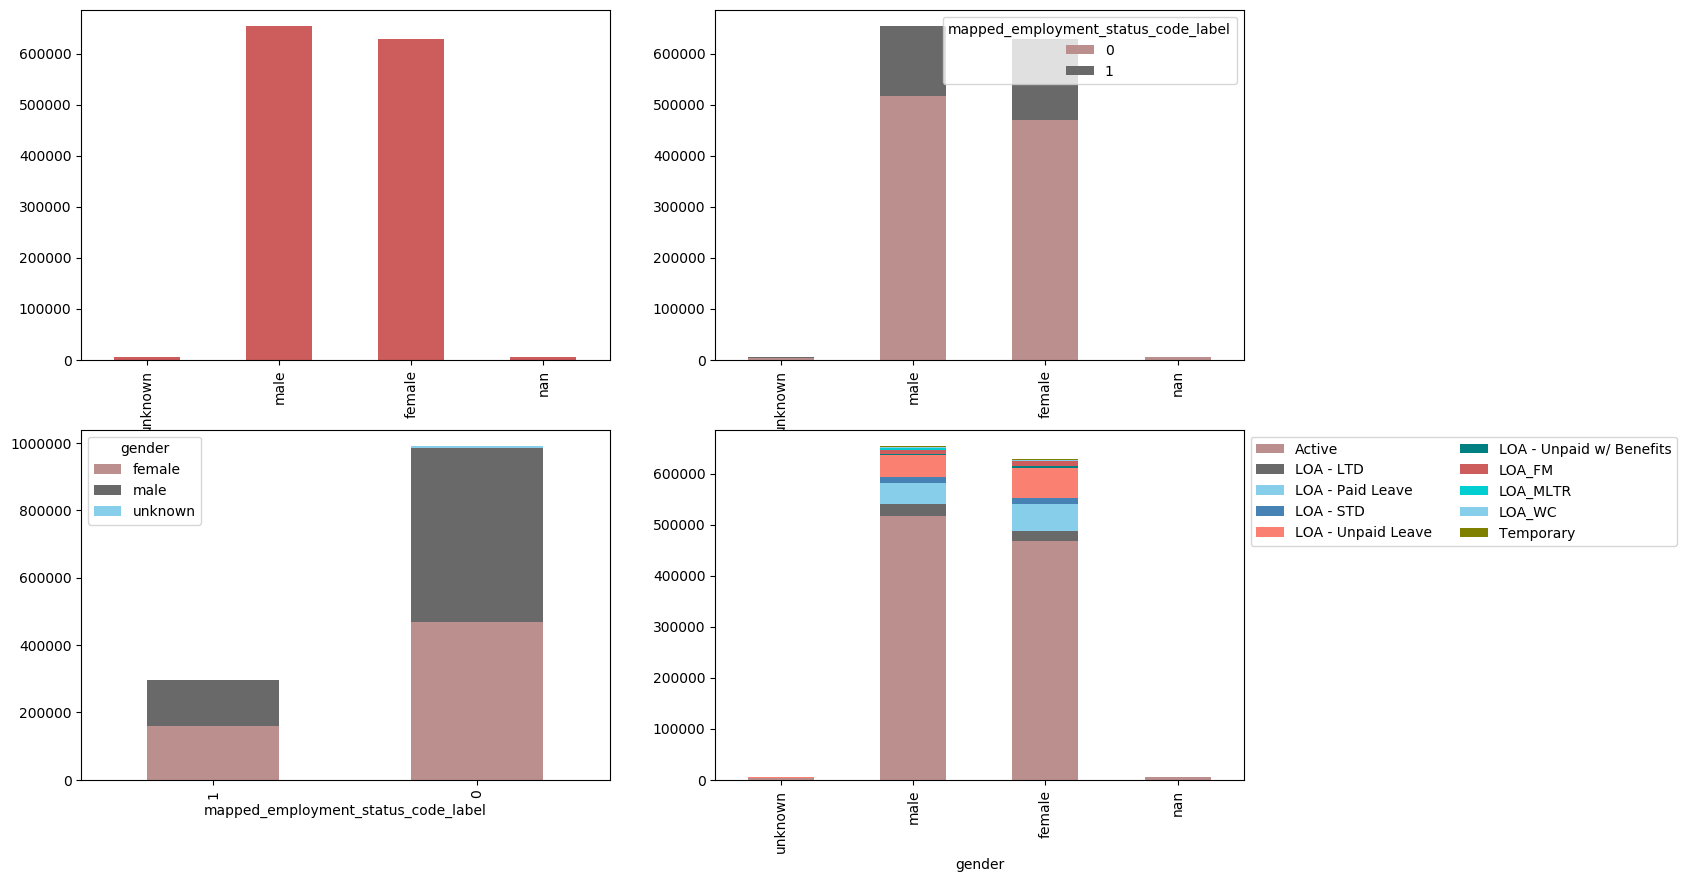

In [15]:
cat_plot('gender')

In [16]:
#imputing missing values
Hype_LOA_Active['gender'].fillna('unknown',inplace=True)

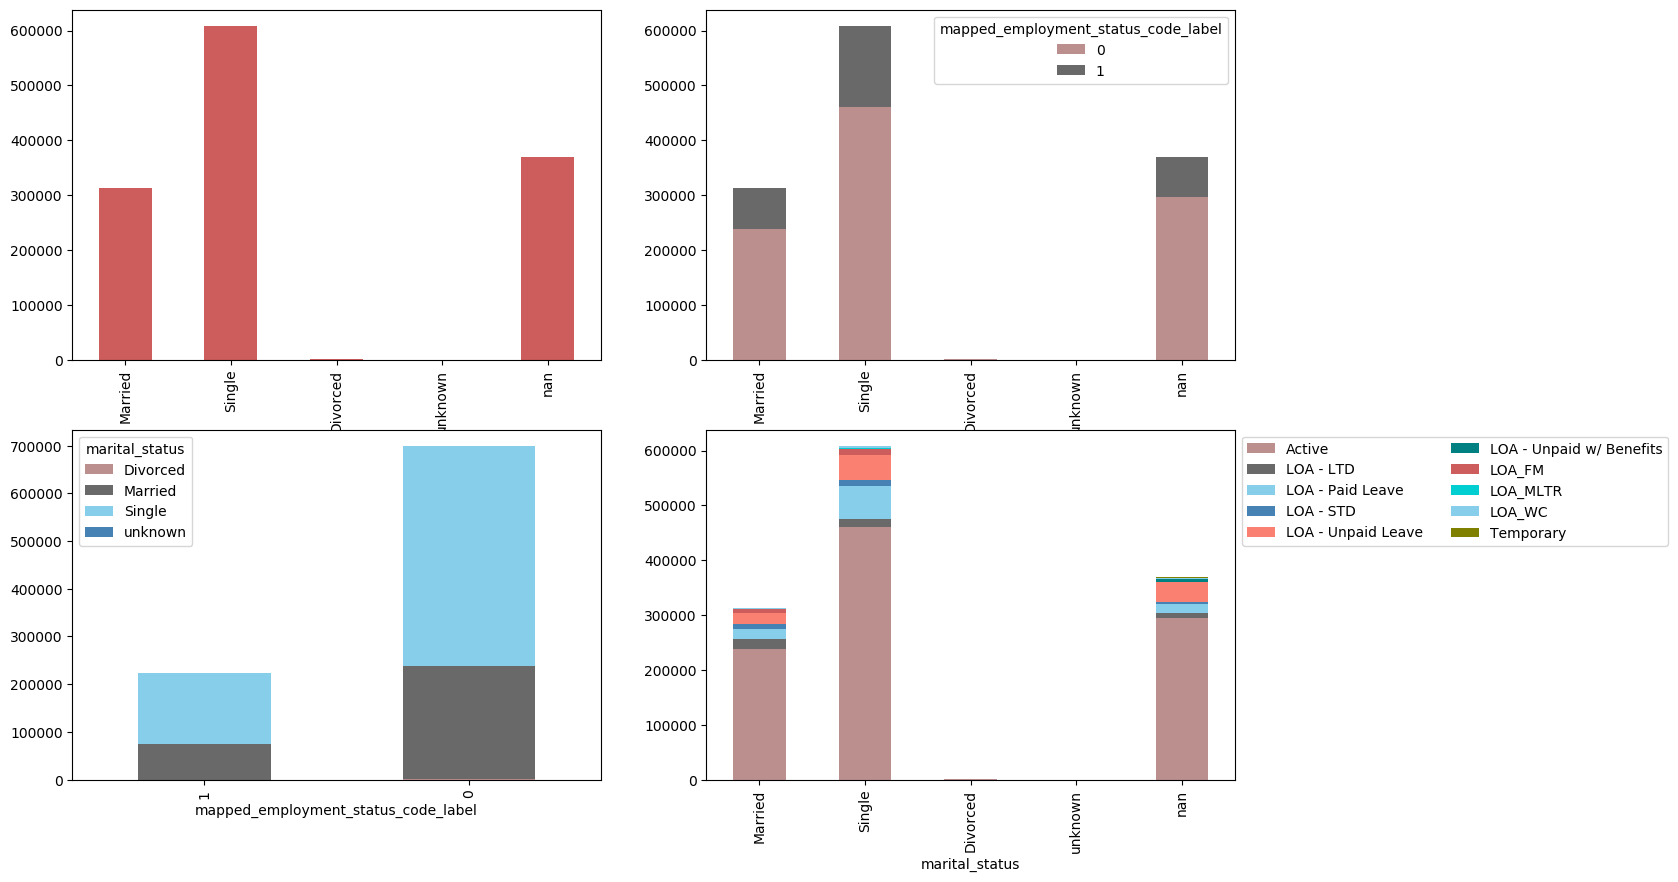

In [17]:
cat_plot('marital_status')

In [18]:
#imputing missing values
Hype_LOA_Active['marital_status'].fillna('unknown',inplace=True)

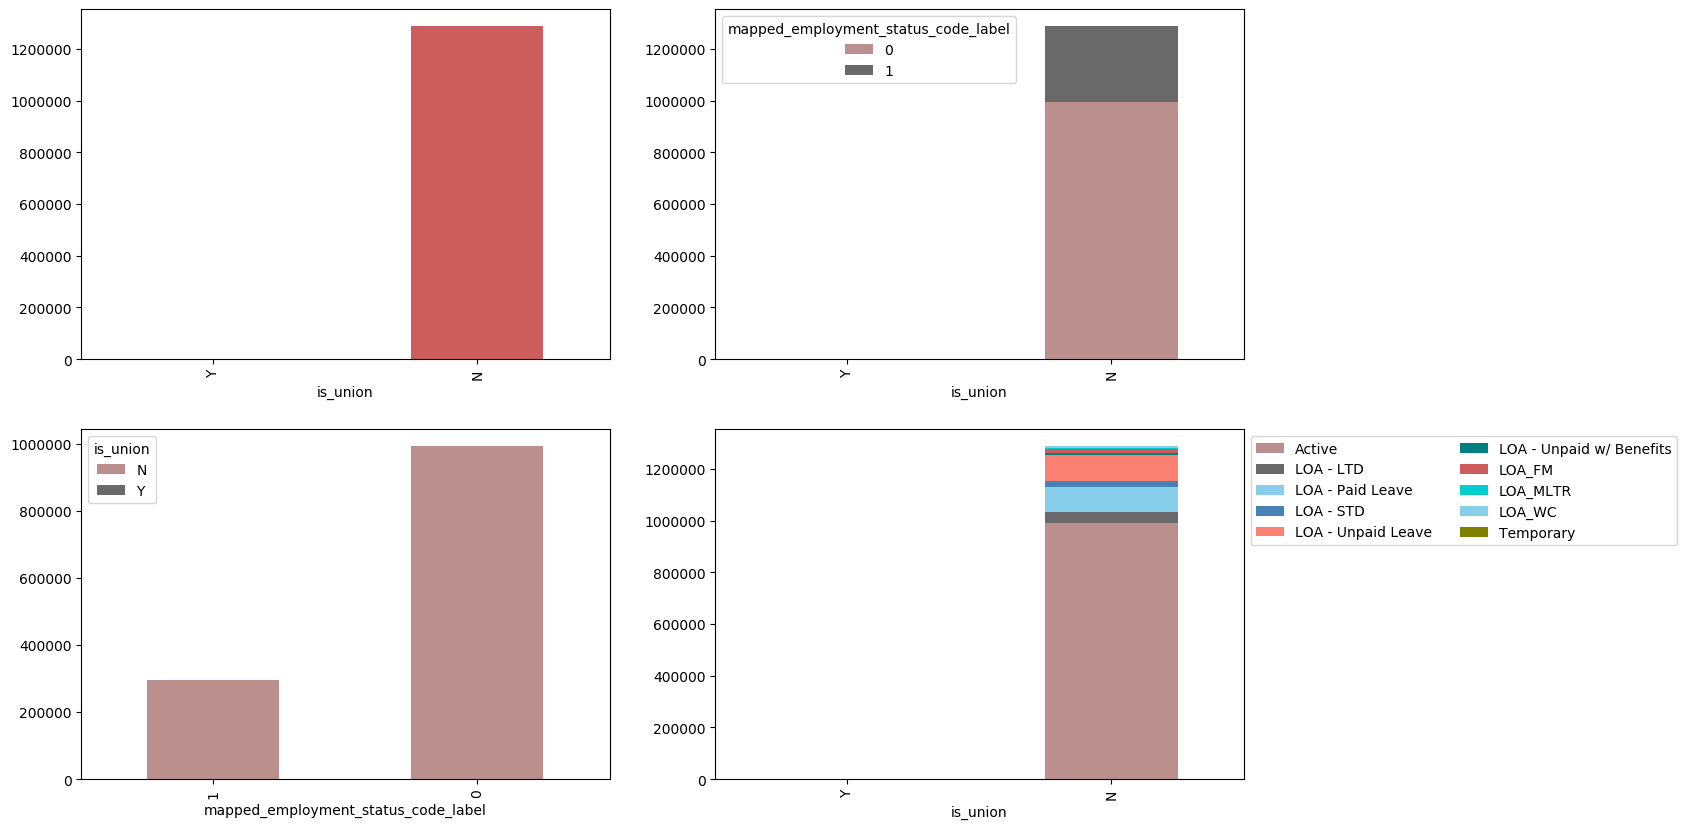

In [19]:
cat_plot('is_union')

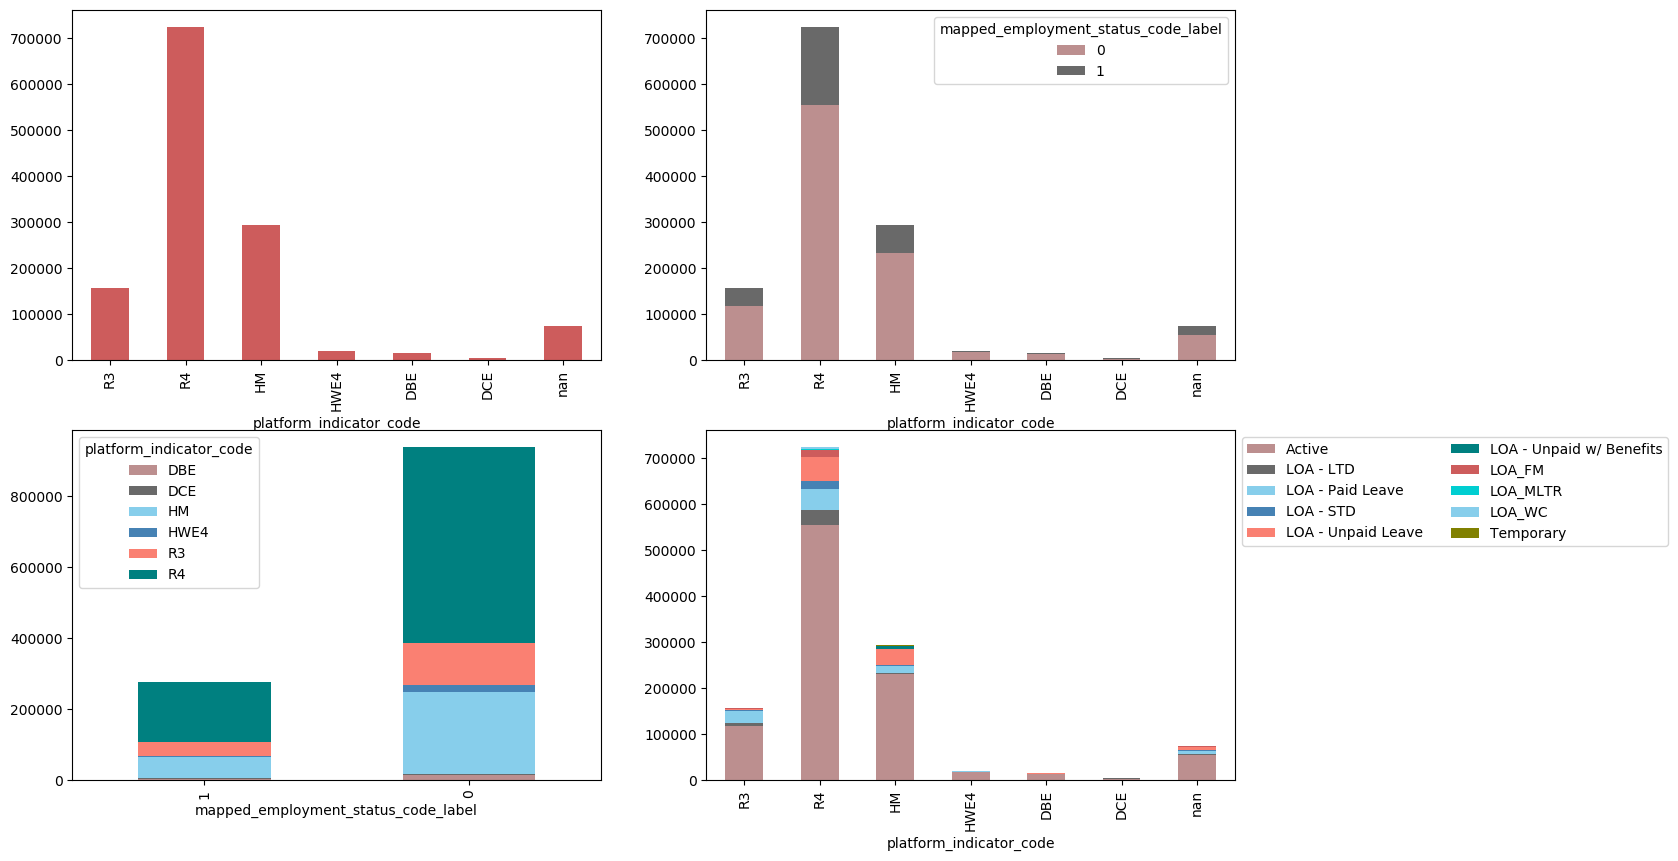

In [20]:
cat_plot('platform_indicator_code')

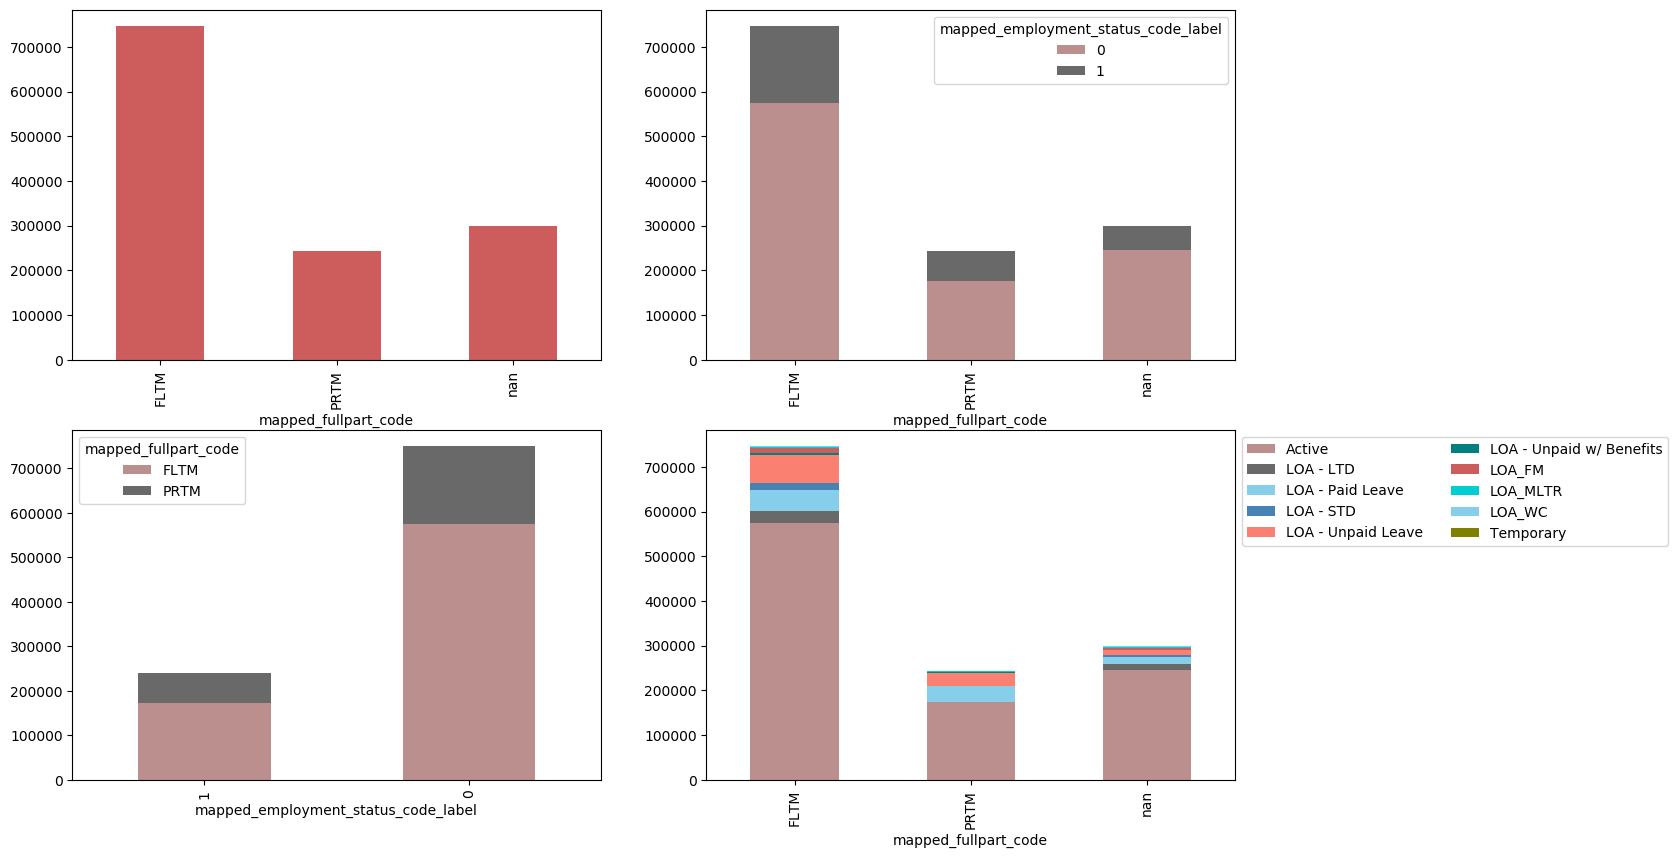

In [21]:
cat_plot('mapped_fullpart_code')

In [22]:
#imputing missing values
Hype_LOA_Active['mapped_fullpart_code'].fillna('unknown',inplace=True)

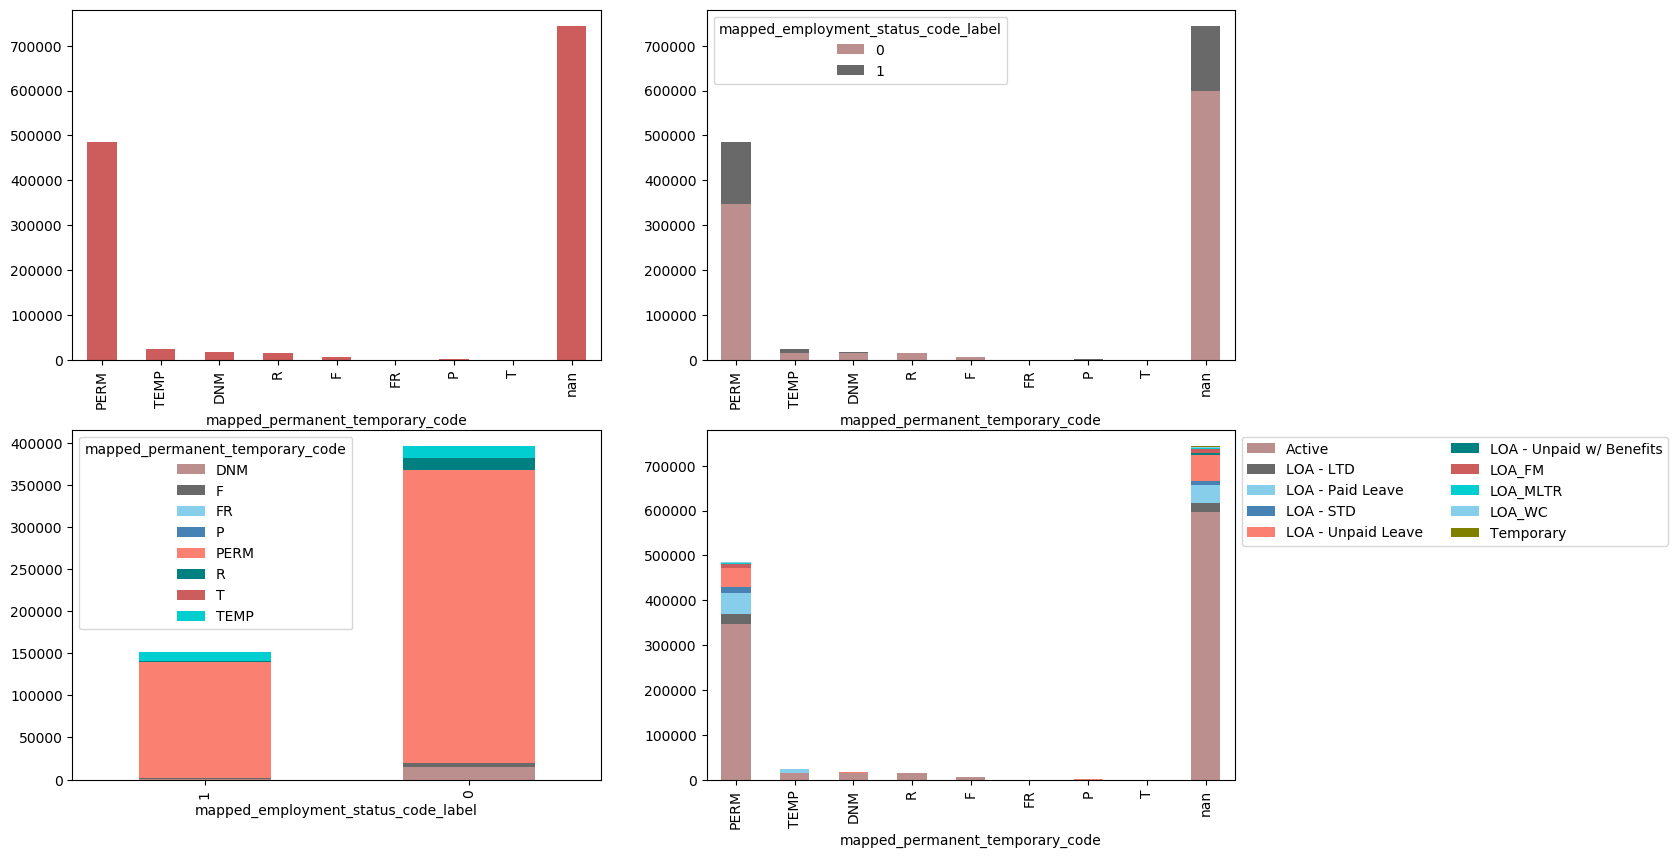

In [23]:
cat_plot('mapped_permanent_temporary_code')

In [24]:
#imputing missing values
Hype_LOA_Active['mapped_permanent_temporary_code'].fillna('unknown',inplace=True)

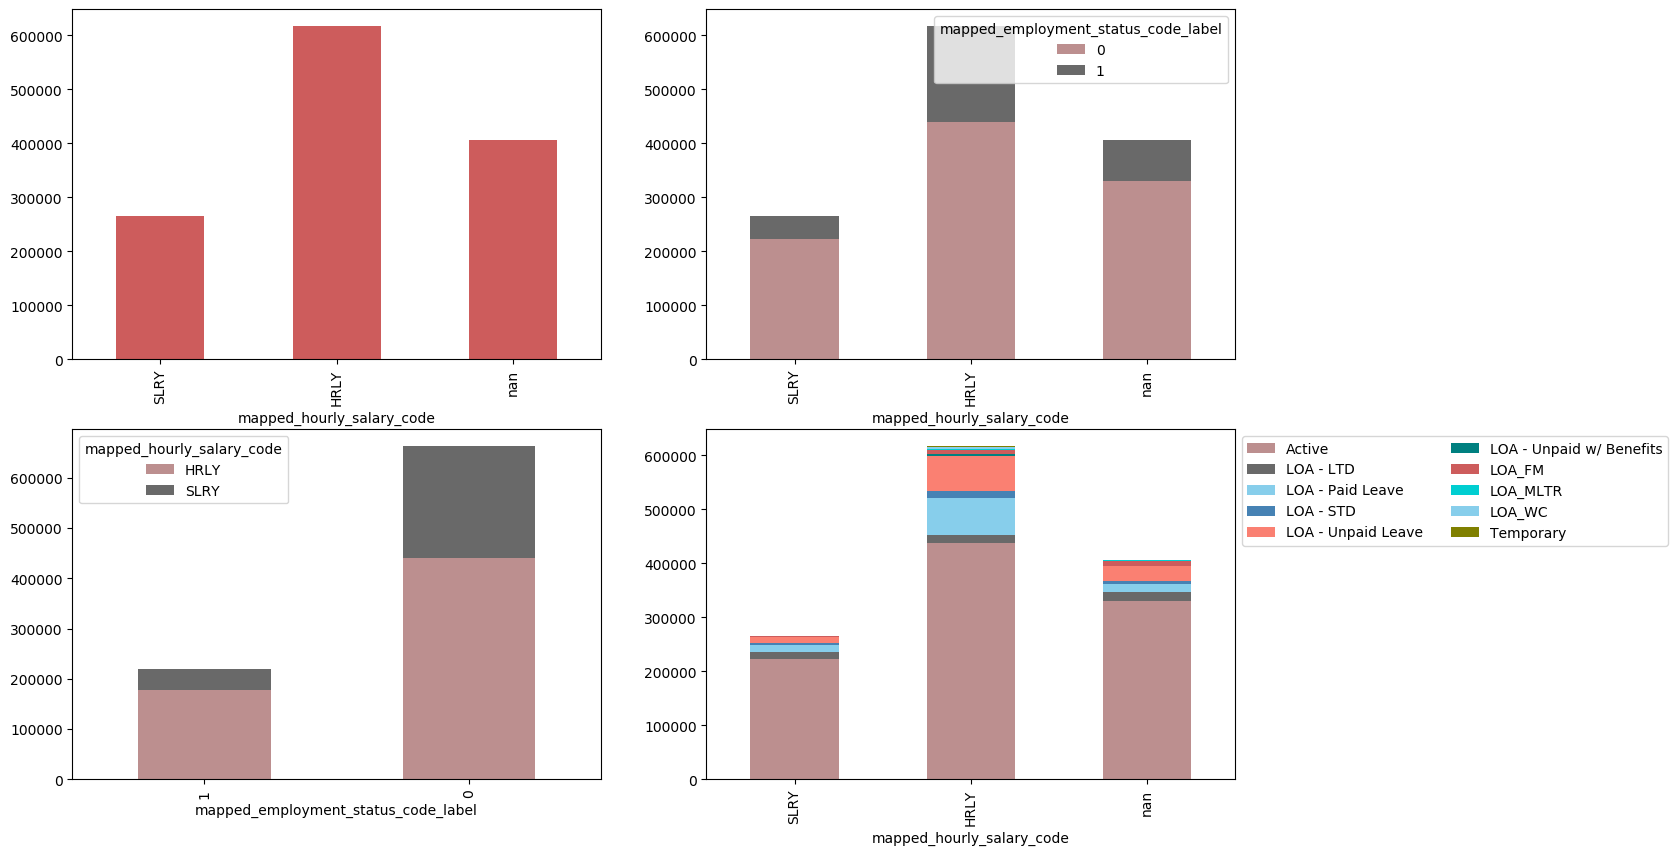

In [25]:
cat_plot('mapped_hourly_salary_code')

In [26]:
#imputing missing values
Hype_LOA_Active['mapped_hourly_salary_code'].fillna('unknown',inplace=True)

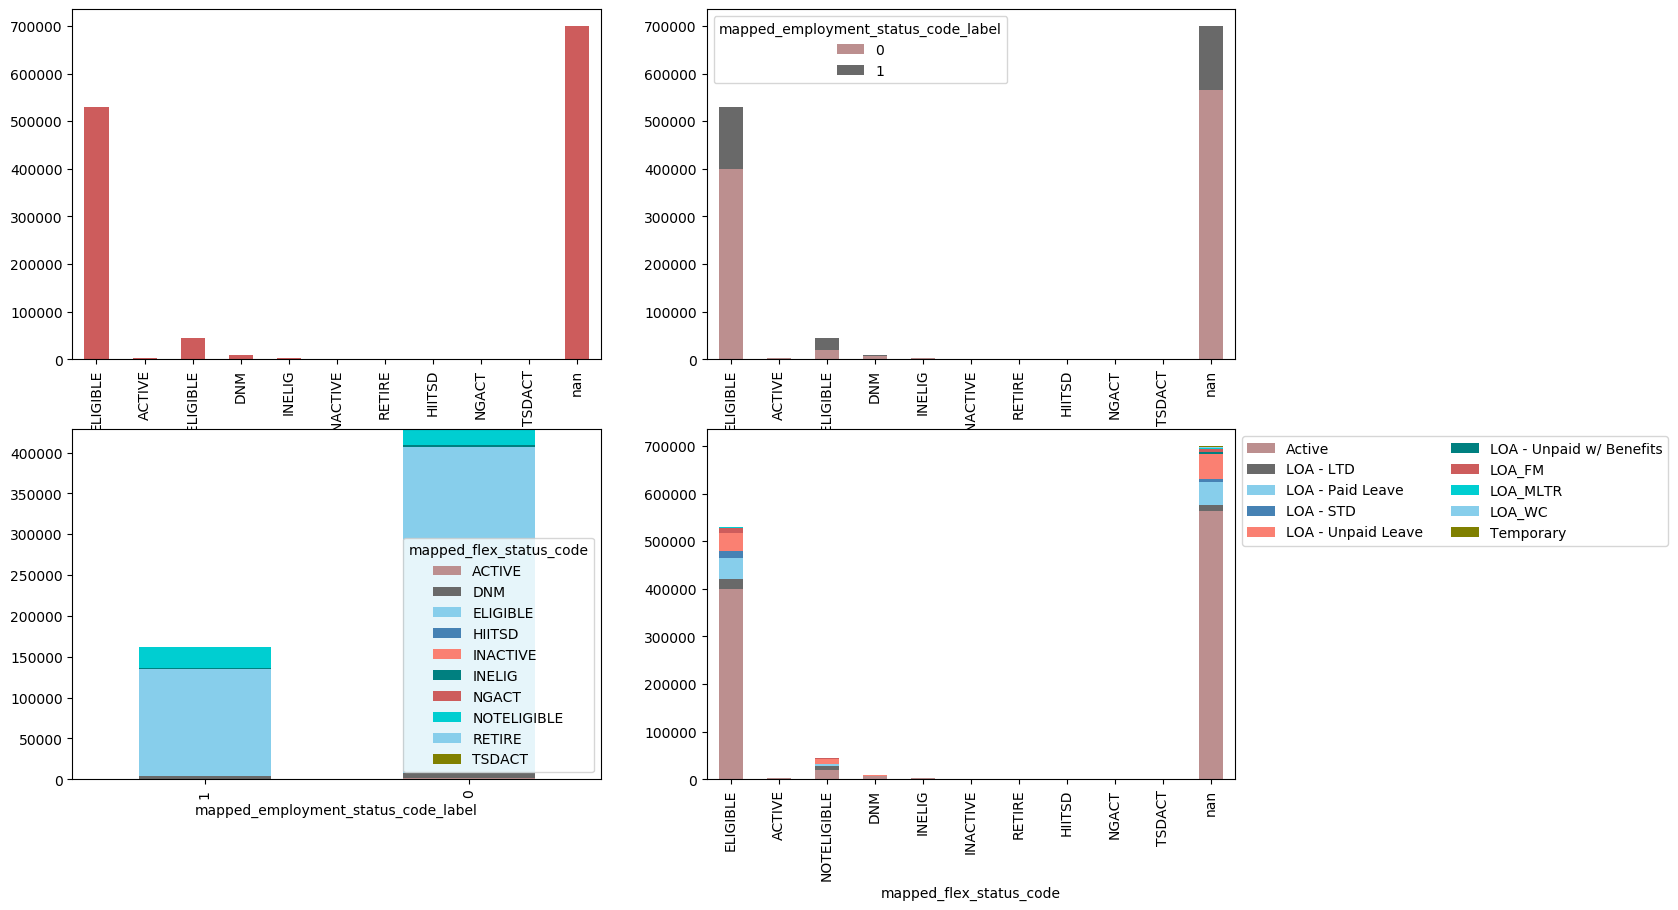

In [27]:
cat_plot('mapped_flex_status_code')

In [28]:
#mputing missing values
Hype_LOA_Active['mapped_flex_status_code'].fillna('unknown',inplace=True)

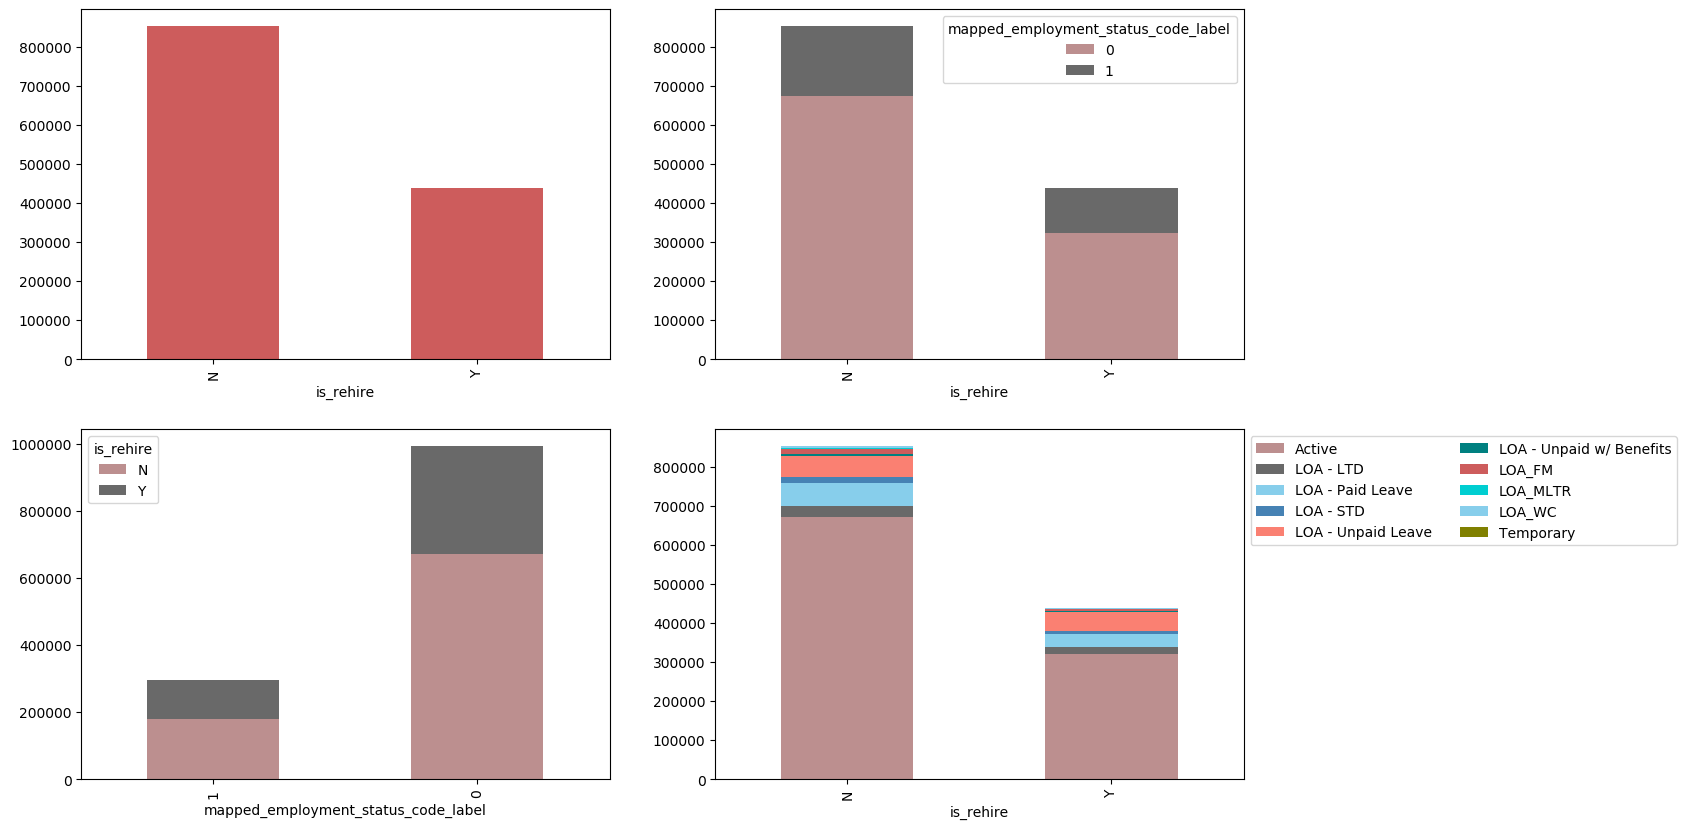

In [29]:
cat_plot('is_rehire')

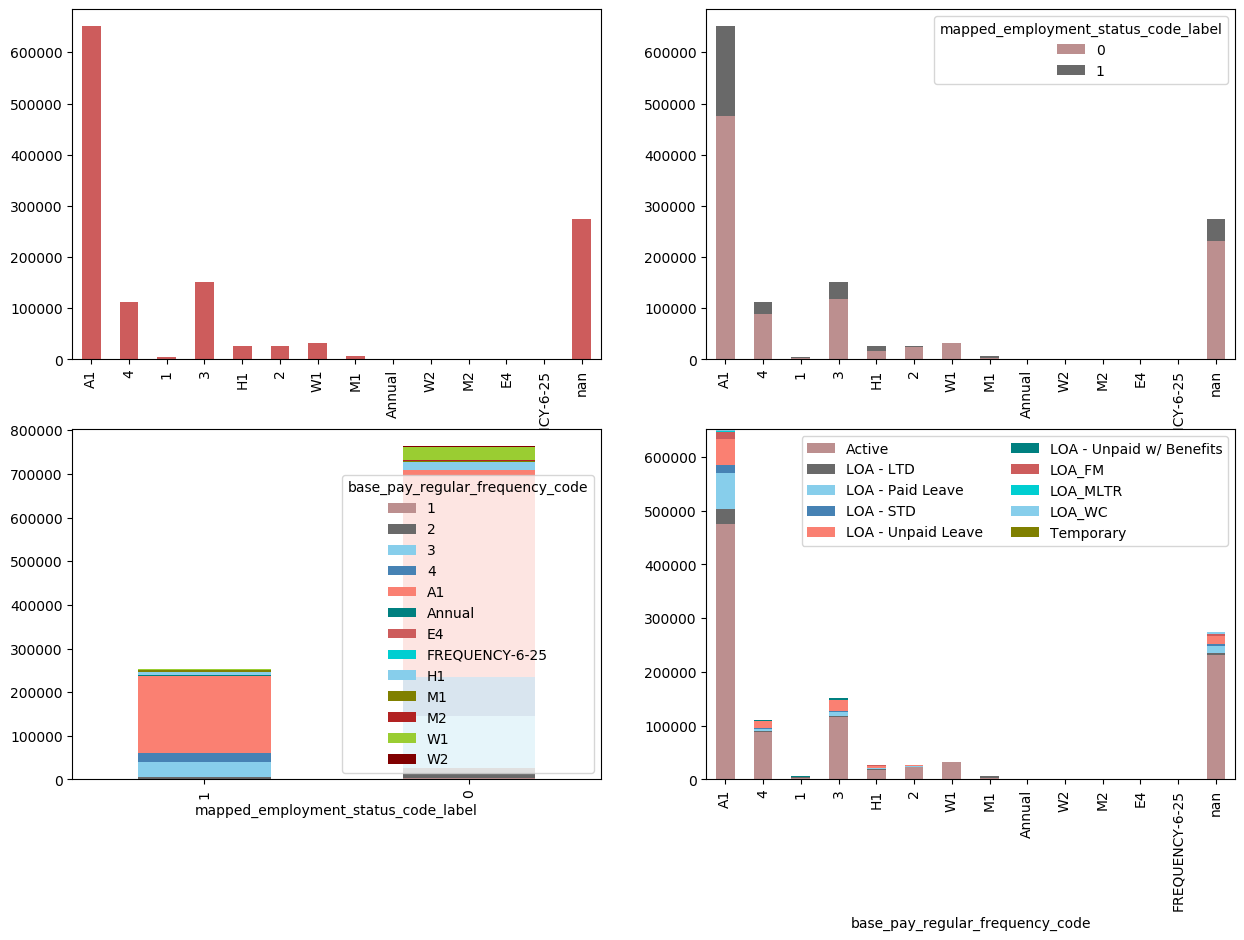

In [30]:
cat_plot('base_pay_regular_frequency_code')

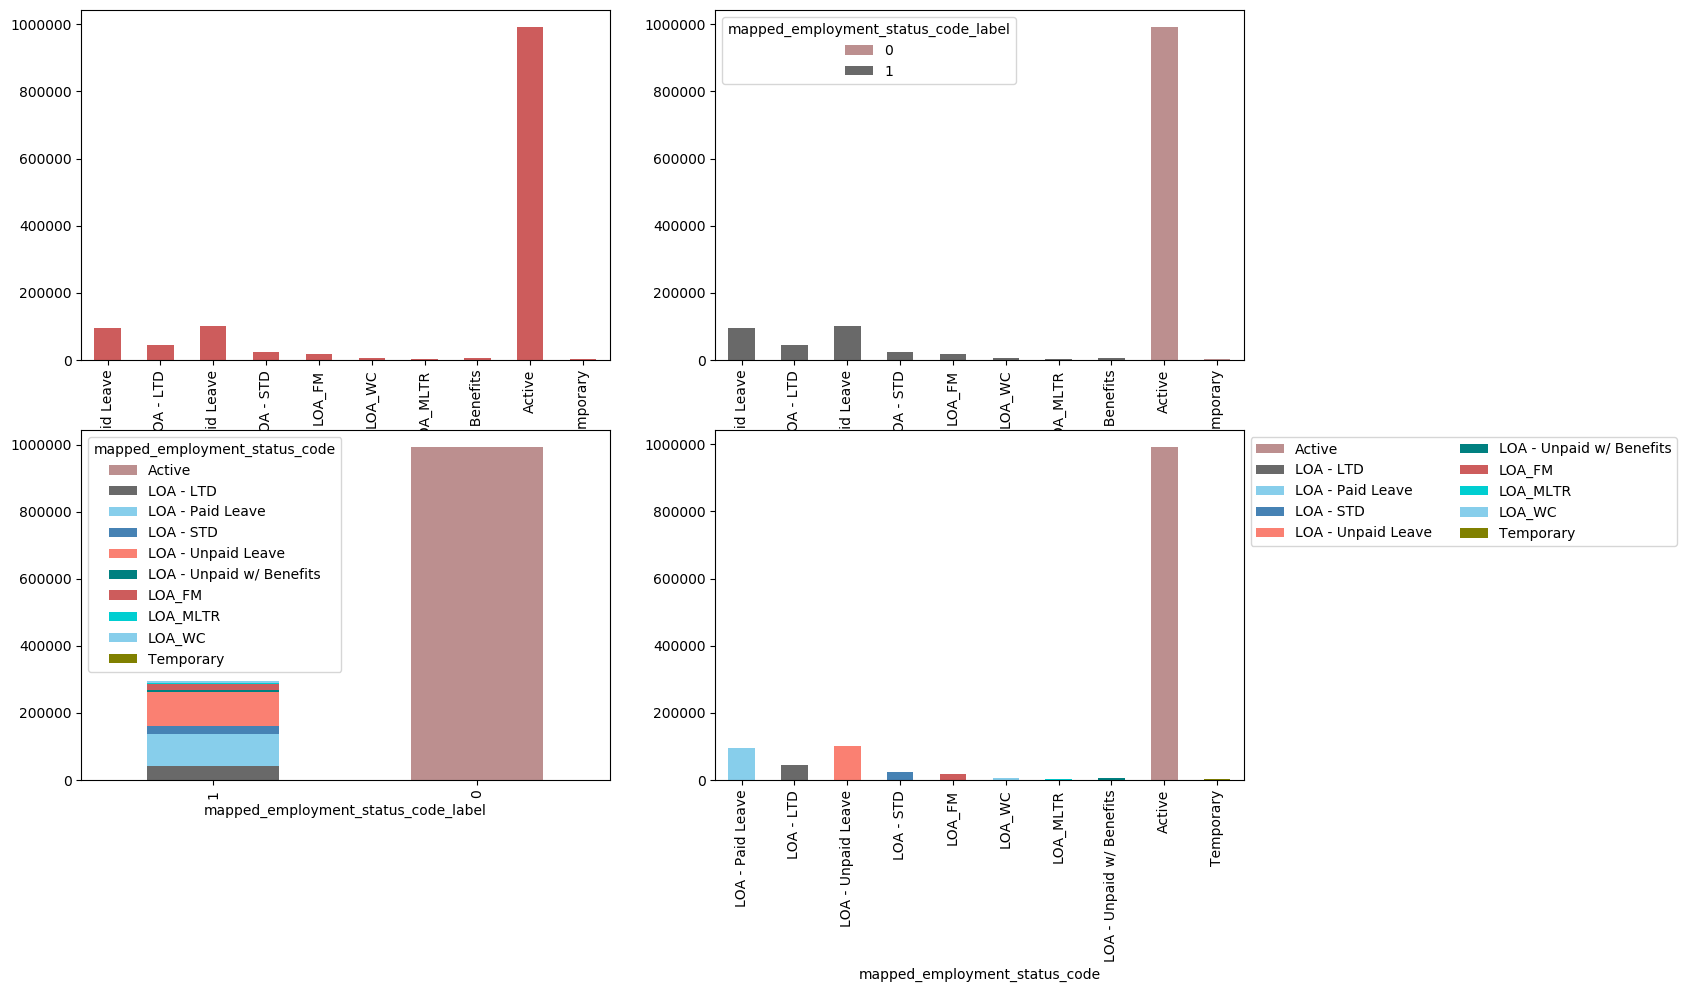

In [31]:
cat_plot('mapped_employment_status_code')

In [32]:
#imputing missing values
Hype_LOA_Active['base_pay_regular_frequency_code'].fillna('unknown',inplace=True)

Creating function to create box plot for numerical variables and filling up missing values with the 'median' as per requirement

In [33]:
def box_plot(predictor):
    df=Hype_LOA_Active
    fig,axes = plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=df, x=predictor, y='mapped_employment_status_code_label', orient='h', ax=axes[0])
    sns.kdeplot(df[df['mapped_employment_status_code_label']==0][predictor], shade=True, label=0, ax=axes[1])
    sns.kdeplot(df[df['mapped_employment_status_code_label']==1][predictor], shade=True, label=1, ax=axes[1])
    plt.title(f'Count of NULL values in {predictor}: {df[predictor].isna().sum()}')
    plt.show()

In [34]:
#checking for int columns
Hype_LOA_Active.select_dtypes('float').columns

Index(['age', 'base_pay_regular_payrate_amount',
       'base_pay_regular_expectedannualsalary'],
      dtype='object')

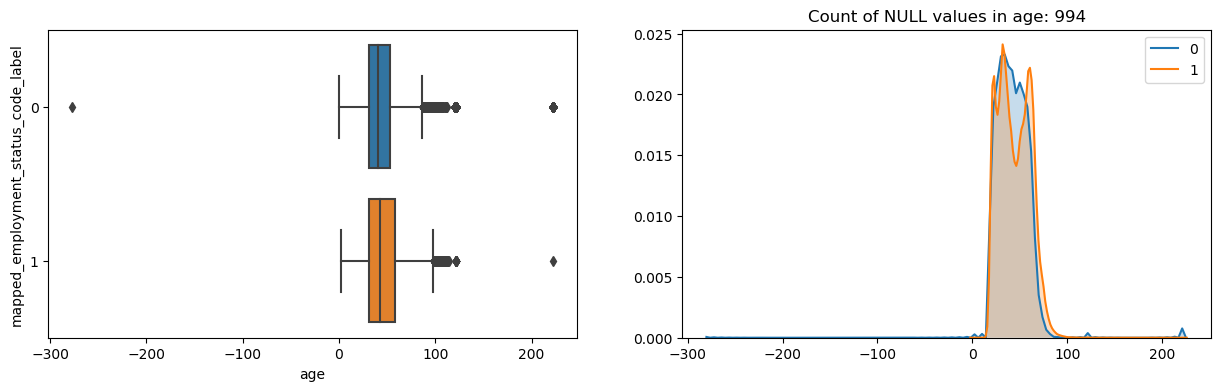

In [35]:
box_plot('age')

Observation-
1. It is clearly visible from above boxplot that there are negative values coming up in age and also age being going over 100 (over Q3). We will cap these outliers based on person's employment status.
2. Missing values will be imputed using median on the train set only, for test set it will be imputed using train set median

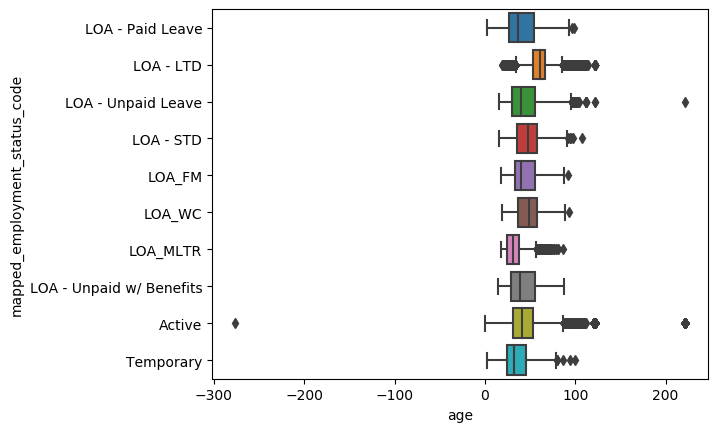

In [36]:
sns.boxplot(data=Hype_LOA_Active, x='age', y='mapped_employment_status_code', orient='h')

In [37]:
df = Hype_LOA_Active

In [38]:
x = df.groupby(['mapped_employment_status_code'])['age'].quantile([0.01, 0.99]).unstack()
capping=x.reset_index()
capping

,mapped_employment_status_code,0.01,0.99
0,Active,18.0,75.0
1,LOA - LTD,29.0,89.0
2,LOA - Paid Leave,19.0,76.0
3,LOA - STD,22.0,77.0
4,LOA - Unpaid Leave,19.0,78.0
5,LOA - Unpaid w/ Benefits,17.0,73.0
6,LOA_FM,23.0,74.0
7,LOA_MLTR,20.0,65.0
8,LOA_WC,21.0,73.0
9,Temporary,18.0,75.0


In [39]:
df.shape

(1290567, 30)

In [40]:
merge_df = df.merge(capping, how='left', on='mapped_employment_status_code')
merge_df.shape

(1290567, 32)

In [41]:
merge_df.rename(columns={0.01:'lower_age_cap',0.99:'upper_age_cap'},inplace=True)

In [42]:
merge_df.head()

,person_internal_id,client_id,udp_global_id,age,gender,marital_status,is_union,country_description,state,platform_indicator_code,...,is_rehire,termination_date,base_pay_regular_payrate_amount,base_pay_regular_frequency_code,base_pay_regular_frequency_description,base_pay_regular_expectedannualsalary,base_pay_regular_expectedannualsalary_range,mapped_employment_status_code_label,lower_age_cap,upper_age_cap
0,46524,8101,58fbc32969b3120424508ae4,60.0,unknown,Married,Y,United States of America,PA,R3,...,N,12/31/2299,81402.84,A1,Annual,81402.84,"$80,000-$99,999",1,19.0,76.0
1,255317740,3349,58a39ba9f7a4410c1584e210,60.0,male,Married,N,United States of America,GA,R4,...,N,12/31/2299,89110.00,A1,Annual,89110.00,"$80,000-$99,999",1,29.0,89.0
2,100097857,5987,5cb1153edab54b416f4eab2d,32.0,female,Married,N,Canada,ON,R4,...,N,12/31/2299,87300.00,A1,Annual,87300.00,"$80,000-$99,999",1,19.0,78.0
3,390892283,936,5d4d2b8369b31218a9b34eb8,34.0,female,Married,N,United States of America,AZ,R4,...,N,12/31/2299,50315.20,A1,Annual,50315.20,"$40,000-$59,999",1,19.0,76.0
4,234497800,7471,5bab3f6b69b312262c3dc921,20.0,female,unknown,N,United States,NC,HM,...,Y,12/31/2299,NaN,4,WEEKLY,61966.67,"$60,000-$79,999",1,19.0,78.0


In [43]:
# merge_df.drop(columns='age_final',inplace=True)

In [44]:
#define conditions
df=merge_df
conditions = [df['age'] < df['lower_age_cap'], 
              df['age'] > df['upper_age_cap']]

#define choices
choices = ['lower_age_cap', 'upper_age_cap']

#create new column in DataFrame that displays results of comparisons
df['winner'] = np.select(conditions, choices, default='inbetween')

#view the DataFrame
df[['age','lower_age_cap','upper_age_cap','winner']]

,age,lower_age_cap,upper_age_cap,winner
0,60.0,19.0,76.0,inbetween
1,60.0,29.0,89.0,inbetween
2,32.0,19.0,78.0,inbetween
3,34.0,19.0,76.0,inbetween
4,20.0,19.0,78.0,inbetween
...,...,...,...,...
1290562,23.0,18.0,75.0,inbetween
1290563,60.0,18.0,75.0,inbetween
1290564,42.0,18.0,75.0,inbetween
1290565,26.0,18.0,75.0,inbetween


In [45]:
df=merge_df
df['final_age'] = ''
df.loc[df["winner"].str.contains("inbetween"), "final_age"] = df["age"]
df.loc[df["winner"].str.contains("lower_age_cap"), "final_age"] = df["lower_age_cap"]
df.loc[df["winner"].str.contains("upper_age_cap"), "final_age"] = df["upper_age_cap"]

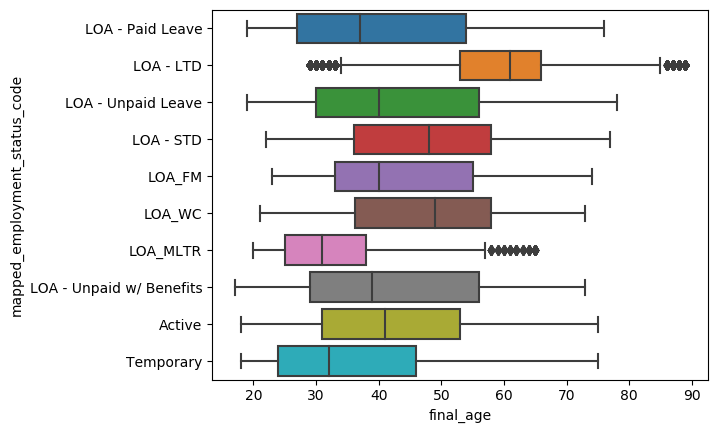

In [46]:
sns.boxplot(data=df, x='final_age', y='mapped_employment_status_code', orient='h')

In [47]:
# #capping outliers
# percentiles = df['age'].quantile([0.01, 0.99]).values
# df['age']= np.clip(df['age'], percentiles[0], percentiles[1])

In [48]:
# df['age'].quantile([0.01, 0.99]).values

In [49]:
df['final_age'].min()

17.0

In [50]:
df['final_age'].max()

89.0

In [51]:
#df.groupby(['mapped_person_employment_status_standard_value'])['person_age'].transform(lambda x: x.quantile(0.95))
df.groupby(['mapped_employment_status_code'])['age'].count()

mapped_employment_status_code
Active                      992108
LOA - LTD                    43099
LOA - Paid Leave             94810
LOA - STD                    23129
LOA - Unpaid Leave          102559
LOA - Unpaid w/ Benefits      5728
LOA_FM                       17384
LOA_MLTR                      3965
LOA_WC                        5330
Temporary                     1461
Name: age, dtype: int64

We will impute these outliers after train-test split, separately for tain and test data

In [52]:
# #imputing missing value (will impute after train-test split)
# Hype_LOA_Active['age'].fillna(Hype_LOA_Active['age'].median(),inplace=True)

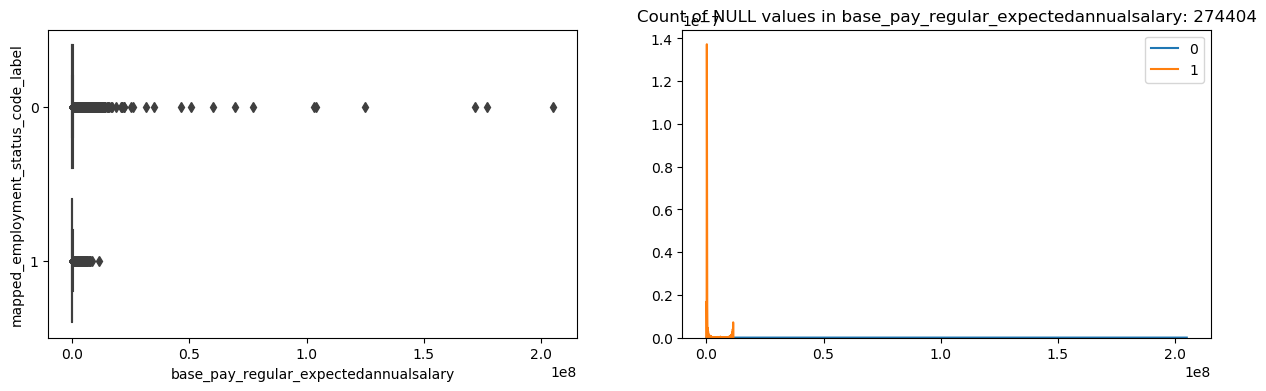

In [53]:
box_plot('base_pay_regular_expectedannualsalary')

We can observe the data is highly skewed and have outliers. Instead of using this column directly in the model, we will create `base_pay_regular_expected_annual_salary_range` column and will use the new column. For that we will firstly fill the missing values with the median based on 'mapped_employment_status_description' column and then will create bins after that.

In [54]:
Hype_LOA_Active['base_pay_regular_expectedannualsalary'].max()

205000000.0

In [55]:
# checking creating bins on the column
bins = [-1, 19999, 39999, 59999, 79999, 99999, 174999,249999, 999999999999]
labels = ['<20,000', '20,000 - 39,999', '40,000 - 59,999', '60,000 - 79,999', '80,000 - 99,999', '100,000-174999', '175000-249999', '>250000']
Hype_LOA_Active['base_pay_regular_expected_annual_salary_range'] = pd.cut(x=Hype_LOA_Active['base_pay_regular_expectedannualsalary'], bins=bins, labels=labels)

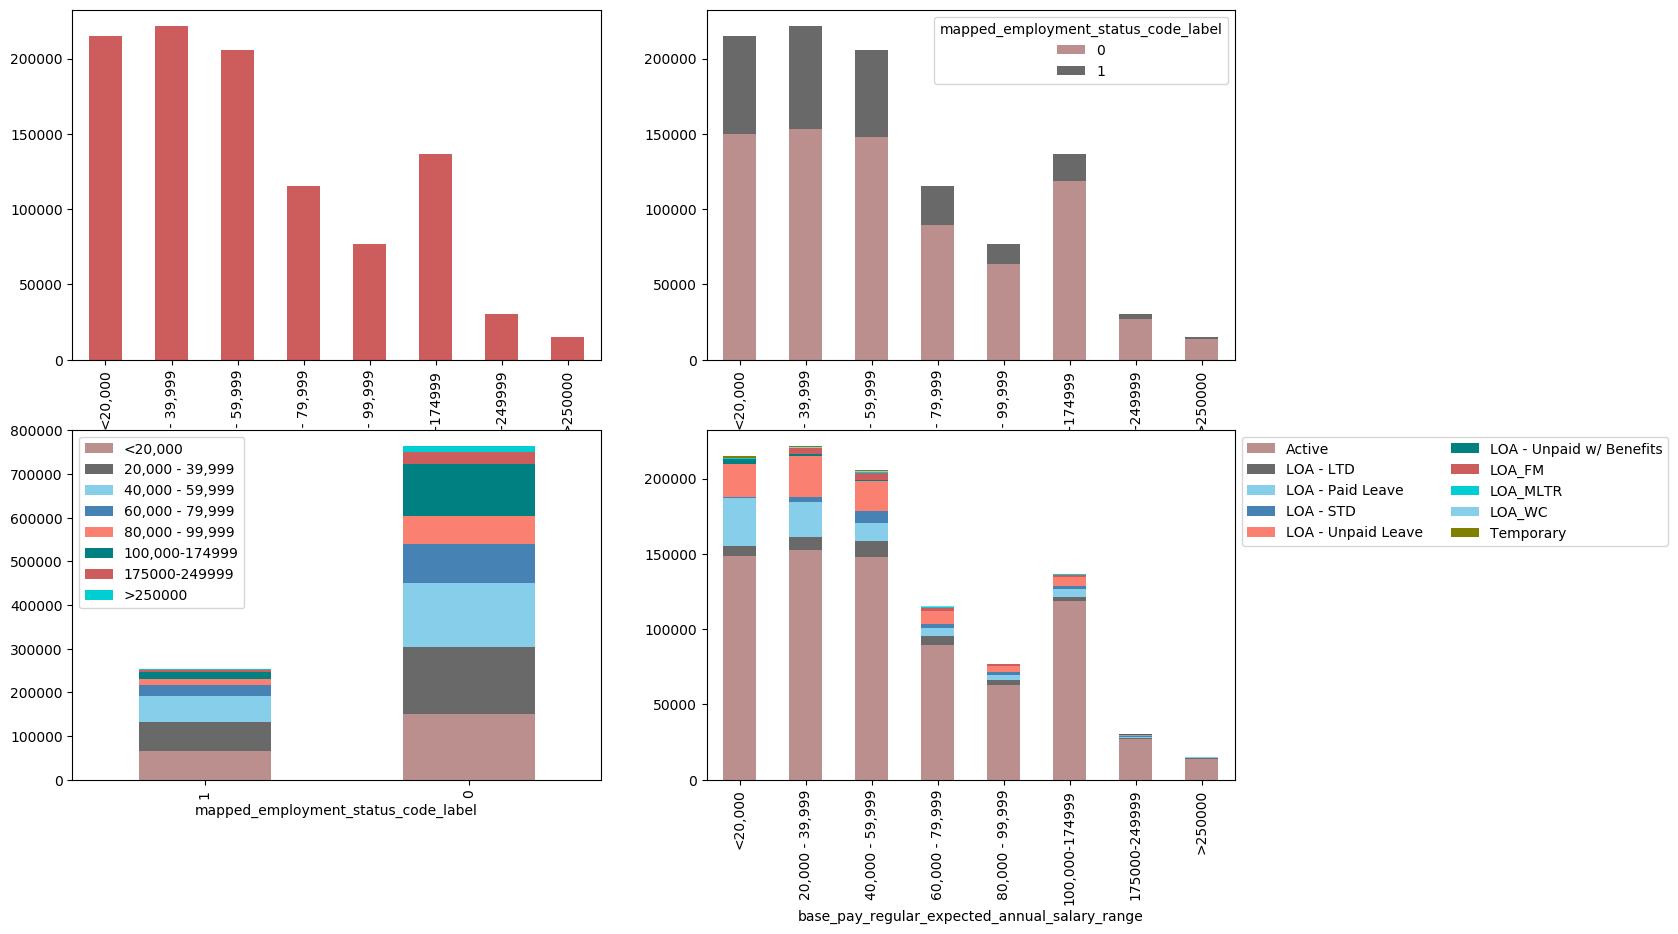

In [56]:
cat_plot('base_pay_regular_expected_annual_salary_range')

In [57]:
Hype_LOA_Active['base_pay_regular_expected_annual_salary_range'].isna().sum()

274404

In [58]:
Hype_LOA_Active[['base_pay_regular_payrate_amount','base_pay_regular_expectedannualsalary']].corr()

,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary
base_pay_regular_payrate_amount,1.0000,0.6487
base_pay_regular_expectedannualsalary,0.6487,1.0000


base_pay_regular_payrate_amount and base_pay_regular_expectedannualsalary are highly correlated, hence we will remove base_pay_regular_payrate_amount from final dataset

In [59]:
# #importing data to csv
# Hype_LOA_Active.to_csv('Half_cleaned_data_for_modelling.csv',index=False)

In [60]:
x =Hype_LOA_Active[Hype_LOA_Active['mapped_employment_status_code_label']==1]

In [61]:
z= x[['base_pay_regular_payrate_amount','base_pay_regular_expectedannualsalary']]
z[z['base_pay_regular_payrate_amount']==15]

,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary
120,15.0,15.0
136,15.0,15.0
453,15.0,15.0
591,15.0,15.0
603,15.0,15.0
...,...,...
294490,15.0,15.0
294791,15.0,15.0
294947,15.0,15.0
295216,15.0,15.0


In [62]:
x['base_pay_regular_payrate_amount'].isna().sum()

102649

In [63]:
x['base_pay_regular_payrate_amount'].median()

35838.4

In [64]:
x['base_pay_regular_payrate_amount'].value_counts(normalize=True)

14.00       0.016221
0.00        0.015756
15.00       0.013874
16.00       0.011081
31200.00    0.009665
              ...   
19169.00    0.000005
73932.67    0.000005
15882.07    0.000005
8824.40     0.000005
43323.80    0.000005
Name: base_pay_regular_payrate_amount, Length: 52927, dtype: float64

In [65]:
y =Hype_LOA_Active[Hype_LOA_Active['mapped_employment_status_code_label']==0]

In [66]:
x.groupby(['mapped_employment_status_code_label'])['base_pay_regular_payrate_amount'].count()

mapped_employment_status_code_label
1    193386
Name: base_pay_regular_payrate_amount, dtype: int64

In [67]:
y.groupby(['mapped_employment_status_code_label'])['base_pay_regular_payrate_amount'].count()

mapped_employment_status_code_label
0    552533
Name: base_pay_regular_payrate_amount, dtype: int64

In [68]:
Hype_LOA_Active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290567 entries, 0 to 1290566
Data columns (total 31 columns):
 #   Column                                         Non-Null Count    Dtype   
---  ------                                         --------------    -----   
 0   person_internal_id                             1290566 non-null  object  
 1   client_id                                      1290567 non-null  int64   
 2   udp_global_id                                  1290567 non-null  object  
 3   age                                            1289573 non-null  float64 
 4   gender                                         1290567 non-null  object  
 5   marital_status                                 1290567 non-null  object  
 6   is_union                                       1290567 non-null  object  
 7   country_description                            1208949 non-null  object  
 8   state                                          1194180 non-null  object  
 9   platform_indi

In [69]:
Hype_LOA_Active.select_dtypes('float').columns

Index(['age', 'base_pay_regular_payrate_amount',
       'base_pay_regular_expectedannualsalary'],
      dtype='object')

In [70]:
Hype_LOA_Active['base_pay_regular_expected_annual_salary_range'] = Hype_LOA_Active['base_pay_regular_expected_annual_salary_range'].astype('object')

In [71]:
# encoded_df = pd.get_dummies(data=Hype_LOA_Active, columns=cat_col, drop_first=True)

In [72]:
Hype_LOA_Active.describe()

,client_id,age,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,mapped_employment_status_code_label
count,1.290567e+06,1.289573e+06,7.459190e+05,1.016163e+06,1.290567e+06
mean,6.622917e+03,4.318303e+01,6.495067e+04,6.656801e+04,2.293837e-01
std,6.237105e+03,1.697249e+01,3.244412e+05,4.322085e+05,4.204366e-01
min,9.500000e+01,-2.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.808000e+03,3.100000e+01,1.674400e+04,2.504320e+04,0.000000e+00
50%,4.881000e+03,4.200000e+01,4.349280e+04,4.501120e+04,0.000000e+00
75%,8.921000e+03,5.500000e+01,8.044811e+04,8.090500e+04,0.000000e+00
max,9.999500e+04,2.220000e+02,1.250000e+08,2.050000e+08,1.000000e+00


In [73]:
# Hype_LOA_Active.dtypes

In [74]:
Hype_LOA_Active = Hype_LOA_Active.convert_dtypes()

In [75]:
# Hype_LOA_Active.dtypes

In [76]:
# # Hype_LOA_Active["age"] = Hype_LOA_Active["age"].astype(int)
# Hype_LOA_Active["base_pay_regular_payrate_amount"] = Hype_LOA_Active["base_pay_regular_payrate_amount"].astype(int)
# Hype_LOA_Active["base_pay_regular_expectedannualsalary"] = Hype_LOA_Active["base_pay_regular_expectedannualsalary"].astype(int)


In [77]:
LOA = Hype_LOA_Active[Hype_LOA_Active['mapped_employment_status_code_label']==1]
Active = Hype_LOA_Active[Hype_LOA_Active['mapped_employment_status_code_label']==0]

In [78]:
# import matplotlib.ticker as mtick
# sns.relplot(x="age",y="base_pay_regular_payrate_amount",data=Hype_LOA_Active,hue='mapped_employment_status_code_label')
# plt.show()

In [79]:
# sns.relplot(x="age",y="base_pay_regular_payrate_amount",data=Active,hue='gender',height=4, aspect=1.5)
# plt.show()

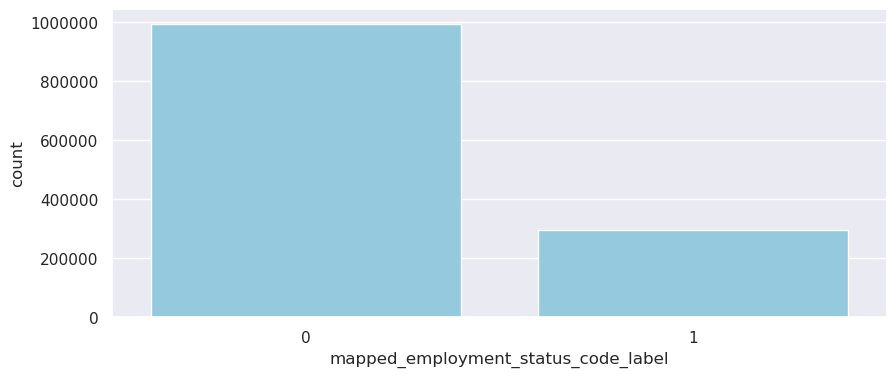

In [80]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(Hype_LOA_Active.mapped_employment_status_code_label,color='skyblue')
plt.show()

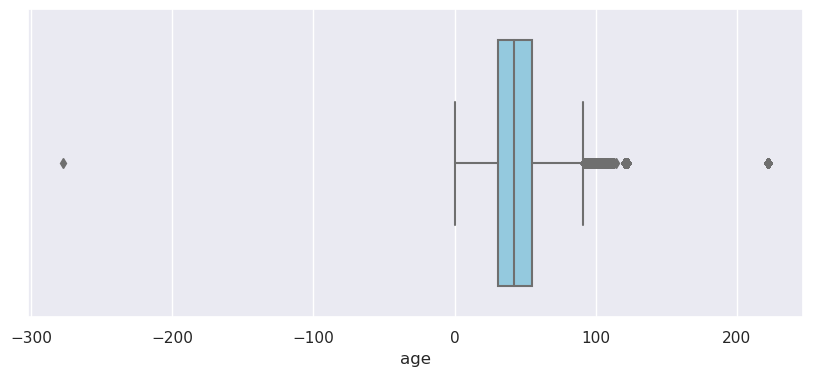

In [81]:
sns.boxplot(Hype_LOA_Active.age,color='skyblue')

In [ ]:
sns.color_palette("tab10")
sns.relplot(x="age",y="base_pay_regular_payrate_amount",data=Hype_LOA_Active,hue='mapped_employment_status_code_label',
            height=4, aspect=1.5)
plt.show()

In [ ]:
# sns.catplot(x="gender",y="age",data=Hype_LOA_Active,hue='mapped_employment_status_code_label',height=4, aspect=1.5)
# plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,4)})
plt.yticks(size=10)
plt.xticks(size=10)
sns.countplot(x = "base_pay_regular_frequency_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
# sns.countplot(LOA.base_pay_regular_payrate_amount)
# plt.xticks(np.arange(LOA.base_pay_regular_payrate_amount.min(), LOA.base_pay_regular_payrate_amount.max()+1, step=8)) 
# plt.show()

In [ ]:
sns.countplot(x = "mapped_flex_status_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x = "mapped_hourly_salary_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="mapped_permanent_temporary_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="mapped_fullpart_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="platform_indicator_code",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="country_description",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="is_rehire",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="gender",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(x ="marital_status",data=Hype_LOA_Active, hue='mapped_employment_status_code_label')
plt.show()

In [ ]:
sns.countplot(Hype_LOA_Active.age)
plt.xticks(np.arange(LOA.age.min(), LOA.age.max()+1, step=8)) 
plt.show()

In [ ]:
b = sns.kdeplot(Hype_LOA_Active['age'], shade=True)
b.axes.set_title('KDE Plot', fontsize = 10)
plt.show()

In [ ]:
CrosstabResult=pd.crosstab(index=Hype_LOA_Active['marital_status'],columns=Hype_LOA_Active['gender'])

In [ ]:
CrosstabResult

In [ ]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)

In [ ]:
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

In [ ]:
ChiSqResult